Data Exploration IPEDS: Trends in Staffing 
Case Study: Yale

Institutional Characteristics, Student FTE, Staff FTE
Fall 2002 - Spring 2022

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Institutional Characteristics is filtered to define scope:
1. Degree-granting
2. Public or not-for-profit
3. Title IV postsecondary institution (accredited)
4. Open to the public 

Institutional Characteristics joined with:
1. Student enrollment & fte
2. Staff fte

Initial data cleaning completed prior to join:
1. Checking for duplicate unitids
2. Imputing missing fte calculations
3. Dropping institutions with 0 student or staff fte reported

Uploading joined master document

In [2]:
df = pd.read_csv("ic_student_staff_master.csv",low_memory=False,encoding = "ISO-8859-1")
df['year'] = pd.to_datetime(df.year,format='%Y')
df['year'] = df['year'].dt.strftime('%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55959 entries, 0 to 55958
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     55959 non-null  int64  
 1   instnm                                     55959 non-null  object 
 2   addr                                       55725 non-null  object 
 3   city                                       55959 non-null  object 
 4   stabbr                                     55959 non-null  object 
 5   zip                                        55959 non-null  object 
 6   obereg                                     55959 non-null  object 
 7   sector                                     55959 non-null  object 
 8   iclevel                                    55959 non-null  object 
 9   control                                    55959 non-null  object 
 10  deggrant              

Create dataframes for comparison:
1. Yale
2. Ivy 
3. Peers   
    - Private
    - Public
    - Private & Public
4. All 4 or more years


Setting up comparison frames

In [3]:
print(df['carnegie_grouped'].unique())

['Doctoral or Research Universities' 'Masters Colleges and Universities'
 'Associates Colleges' 'Baccalaureate Colleges and Universities'
 'Specialized Institutions']


In [4]:
yale = df[df['unitid']==130794]
yale = yale.reset_index(drop=True)
yale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   unitid                                     20 non-null     int64  
 1   instnm                                     20 non-null     object 
 2   addr                                       17 non-null     object 
 3   city                                       20 non-null     object 
 4   stabbr                                     20 non-null     object 
 5   zip                                        20 non-null     object 
 6   obereg                                     20 non-null     object 
 7   sector                                     20 non-null     object 
 8   iclevel                                    20 non-null     object 
 9   control                                    20 non-null     object 
 10  deggrant                    

student fte per staff fte                  20 non-null     float64
 35  student fte per instruction staff fte      20 non-null     float64
 36  student fte per non instruction staff fte  20 non-null     float64

 "instruction, research and public service"
 "non instructional staff"

In [5]:
yale_ratio_all_staff = yale[['year','student fte per staff fte']]
cols = ['year','student staff ratio']
yale_ratio_all_staff.columns = cols
yale_ratio_all_staff["type"] = "all staff"
yale_ratio_all_staff.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/1076314198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_ratio_all_staff["type"] = "all staff"


,year,student staff ratio,type
0,2002,2.02,all staff
1,2003,1.80,all staff


In [6]:
yale_ratio_instruction_staff = yale[['year','student fte per instruction staff fte']]
cols = ['year','student staff ratio']
yale_ratio_instruction_staff.columns = cols
yale_ratio_instruction_staff["type"] = "instruction, research and public service"
yale_ratio_instruction_staff.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/1101047425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_ratio_instruction_staff["type"] = "instruction, research and public service"


,year,student staff ratio,type
0,2002,8.60,"instruction, research and public service"
1,2003,7.49,"instruction, research and public service"


In [7]:
yale_ratio_non_instruction_staff = yale[['year','student fte per non instruction staff fte']]
cols = ['year','student staff ratio']
yale_ratio_non_instruction_staff.columns = cols
yale_ratio_non_instruction_staff["type"] = "non instructional staff"
yale_ratio_non_instruction_staff.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/3222937767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_ratio_non_instruction_staff["type"] = "non instructional staff"


,year,student staff ratio,type
0,2002,2.63,non instructional staff
1,2003,2.37,non instructional staff


In [38]:
yale_ratio = pd.concat([yale_ratio_all_staff,yale_ratio_instruction_staff,yale_ratio_non_instruction_staff],ignore_index=False)
yale_ratio=yale_ratio.reset_index(drop=True)

yale_ratio.head(2)

,year,student staff ratio,type
0,2002,2.02,all staff
1,2003,1.80,all staff


Percentage Change in the Ratio!

In [39]:
yale_ratio_pct_change = yale_ratio.groupby(['year','type']).agg({'student staff ratio':'sum'})
yale_ratio_pct_change.columns = ['student staff ratio']
yale_ratio_pct_change = yale_ratio_pct_change.reset_index()

yale_ratio_pct_change['student staff ratio pct change'] = yale_ratio_pct_change['student staff ratio'].pct_change()
yale_ratio_pct_change['student staff ratio pct change'] = (yale_ratio_pct_change['student staff ratio pct change']*100).round(2)
yale_ratio_pct_change = yale_ratio_pct_change.fillna(0.00)

In [68]:
#yale_ratio_2002 = yale_ratio_pct_change[yale_ratio_pct_change['year']=='2002']

In [69]:
#print(yale_ratio_2002.head())

   year                                      type  student staff ratio  \
0  2002                                 all staff                 2.02   
1  2002  instruction, research and public service                 8.60   
2  2002                   non instructional staff                 2.63   

   student staff ratio pct change  
0                             NaN  
1                          325.74  
2                          -69.42  


In [ ]:
yale_ratio_pct_change_all_staff = yale_ratio_pct_change[yale_ratio_pct_change['type']=='all staff']
yale_ratio_pct_change_instruction = yale_ratio_pct_change[yale_ratio_pct_change['type']=='instruction, research and public service']
yale_ratio_pct_change_non_instruction = yale_ratio_pct_change[yale_ratio_pct_change['type']=='non instructional staff']

In [ ]:
yale_ratio_base_all_staff = 2.02
base_date = '2002-01-01'

def yale_pct_change_period_ratio_all_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['student staff ratio']-yale_ratio_base_all_staff)/yale_ratio_base_all_staff)*100)
    else:
        return 0.0
    
yale_ratio_pct_change_all_staff['student staff ratio cumulative'] = yale_ratio_pct_change_all_staff.apply(lambda row: yale_pct_change_period_ratio_all_staff(row), axis=1)

print(yale_ratio_base_all_staff)

In [ ]:
yale_ratio_base_instruction_staff = 8.60
base_date = '2002-01-01'

def yale_pct_change_period_ratio_instruction_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['student staff ratio']-yale_ratio_base_instruction_staff)/yale_ratio_base_instruction_staff)*100)
    else:
        return 0.0
    
yale_ratio_pct_change_instruction['student staff ratio cumulative'] = yale_ratio_pct_change_instruction.apply(lambda row: yale_pct_change_period_ratio_instruction_staff(row), axis=1)

print(yale_ratio_pct_change_instruction)

In [ ]:
yale_ratio_base_non_instruction_staff = 2.63
base_date = '2002-01-01'

def yale_pct_change_period_ratio_non_instruction_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['student staff ratio']-yale_ratio_base_non_instruction_staff)/yale_ratio_base_non_instruction_staff)*100)
    else:
        return 0.0
    
yale_ratio_pct_change_non_instruction['student staff ratio cumulative'] = yale_ratio_pct_change_non_instruction.apply(lambda row: yale_pct_change_period_ratio_non_instruction_staff(row), axis=1)

print(yale_ratio_pct_change_non_instruction)

In [ ]:
yale_ratio_pct_change_merge = pd.concat([yale_ratio_base_all_staff,yale_ratio_base_instruction_staff,yale_ratio_base_non_instruction_staff],ignore_index=False)
yale_ratio_pct_change_merge.head(3)

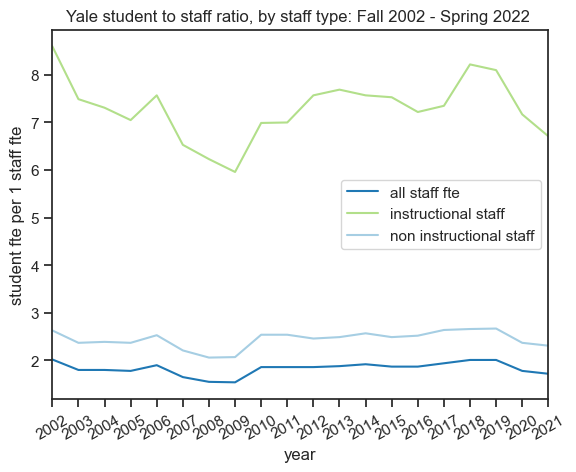

In [70]:
sns.set_theme(style="ticks")
custom_palette = ['#1f78b4','#b2df8a','#a6cee3']
              
yale_student_staff_ratio = sns.lineplot(x='year',y='student staff ratio', hue ='type', data=yale_ratio, legend='brief', palette=custom_palette)

plt.ylabel('student fte per 1 staff fte')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['all staff fte','instructional staff','non instructional staff'])
plt.title('Yale student to staff ratio, by staff type: Fall 2002 - Spring 2022 ')
plt.show()

In [71]:
phd = df[df['carnegie_grouped']=='Doctoral or Research Universities']
phd = phd.reset_index(drop=True)
phd.head(2)


,unitid,instnm,addr,city,stabbr,zip,obereg,sector,iclevel,control,...,total instruction pt,total instruction staff fte,total non instruction,total non instruction ft,total non instruction pt,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,ivy league
0,100654,Alabama A & M University,4107 MERIDIAN ST,NORMAL,AL,35762,Southeast,4-year public,Four or more years,Public,...,84.0,320.0,842.0,722.0,120.0,762.0,4.86,16.44,6.90,not an ivy
1,100663,University Of Alabama At Birmingham,ADMINISTRATION BLDG SUITE 1070,BIRMINGHAM,AL,35294-0110,Southeast,4-year public,Four or more years,Public,...,84.0,959.0,3666.0,2790.0,876.0,3082.0,3.06,12.88,4.01,not an ivy


In [72]:
phd_masters_list = ['Doctoral or Research Universities','Masters Colleges and Universities']

phd_masters = df[df['carnegie_grouped'].isin(phd_masters_list)]
phd_masters = phd_masters.reset_index(drop=True)
phd_masters.head(2)


,unitid,instnm,addr,city,stabbr,zip,obereg,sector,iclevel,control,...,total instruction pt,total instruction staff fte,total non instruction,total non instruction ft,total non instruction pt,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,ivy league
0,100654,Alabama A & M University,4107 MERIDIAN ST,NORMAL,AL,35762,Southeast,4-year public,Four or more years,Public,...,84.0,320.0,842.0,722.0,120.0,762.0,4.86,16.44,6.90,not an ivy
1,100663,University Of Alabama At Birmingham,ADMINISTRATION BLDG SUITE 1070,BIRMINGHAM,AL,35294-0110,Southeast,4-year public,Four or more years,Public,...,84.0,959.0,3666.0,2790.0,876.0,3082.0,3.06,12.88,4.01,not an ivy


In [73]:
yale_pct_change = yale.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum'})
yale_pct_change.columns = ['student_fte','staff_fte','instruction_staff_fte','non_instruction_staff_fte']
yale_pct_change = yale_pct_change.reset_index()

yale_pct_change['student_pct_change'] = yale_pct_change['student_fte'].pct_change()
yale_pct_change['student_pct_change'] = (yale_pct_change['student_pct_change']*100).round(2)

yale_pct_change['staff_pct_change'] = yale_pct_change['staff_fte'].pct_change()
yale_pct_change['staff_pct_change'] = (yale_pct_change['staff_pct_change']*100).round(2)

yale_pct_change['instruction_staff_pct_change'] = yale_pct_change['instruction_staff_fte'].pct_change()
yale_pct_change['instruction_staff_pct_change'] = (yale_pct_change['instruction_staff_pct_change']*100).round(2)

yale_pct_change['non_instruction_staff_pct_change'] = yale_pct_change['non_instruction_staff_fte'].pct_change()
yale_pct_change['non_instruction_staff_pct_change'] = (yale_pct_change['non_instruction_staff_pct_change']*100).round(2)

yale_pct_change = yale_pct_change.fillna(0.00)

print(yale_pct_change)

    year  student_fte  staff_fte  instruction_staff_fte  \
0   2002        11261     5588.0                 1309.0   
1   2003        10654     5924.0                 1422.0   
2   2004        10845     6013.0                 1483.0   
3   2005        11288     6355.0                 1601.0   
4   2006        12526     6604.0                 1655.0   
5   2007        11397     6907.0                 1746.0   
6   2008        11559     7463.0                 1854.0   
7   2009        11617     7560.0                 1948.0   
8   2010        13686     7351.0                 1957.0   
9   2011        13697     7347.0                 1956.0   
10  2012        13550     7301.0                 1789.0   
11  2013        14111     7496.0                 1835.0   
12  2014        14522     7565.0                 1918.0   
13  2015        14518     7750.0                 1929.0   
14  2016        14738     7880.0                 2041.0   
15  2017        15512     7976.0                 2110.0 

In [74]:
yale_base_student = 11261
base_date = '2002-01-01'

def yale_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student_fte']-yale_base_student)/yale_base_student)*100)
    else:
        return 0.0
    
yale_pct_change['student_pct_change_cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_student(row), axis=1)

print(yale_pct_change)

    year  student_fte  staff_fte  instruction_staff_fte  \
0   2002        11261     5588.0                 1309.0   
1   2003        10654     5924.0                 1422.0   
2   2004        10845     6013.0                 1483.0   
3   2005        11288     6355.0                 1601.0   
4   2006        12526     6604.0                 1655.0   
5   2007        11397     6907.0                 1746.0   
6   2008        11559     7463.0                 1854.0   
7   2009        11617     7560.0                 1948.0   
8   2010        13686     7351.0                 1957.0   
9   2011        13697     7347.0                 1956.0   
10  2012        13550     7301.0                 1789.0   
11  2013        14111     7496.0                 1835.0   
12  2014        14522     7565.0                 1918.0   
13  2015        14518     7750.0                 1929.0   
14  2016        14738     7880.0                 2041.0   
15  2017        15512     7976.0                 2110.0 

In [75]:
yale_base_staff = 5588.0
base_date = '2002-01-01'

def yale_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['staff_fte']-yale_base_staff)/yale_base_staff)*100)
    else:
        return 0.0
    
yale_pct_change['staff_pct_change_cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_staff(row), axis=1)
yale_pct_change['staff_pct_change_cumulative'] = yale_pct_change['staff_pct_change_cumulative'].round(2)

#print(yale_pct_change)

In [76]:
yale_base_instruction = 1309.0
base_date = '2002-01-01'

def yale_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['instruction_staff_fte']-yale_base_instruction)/yale_base_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['instruction_pct_change_cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_instruction(row), axis=1)
yale_pct_change['instruction_pct_change_cumulative'] = yale_pct_change['instruction_pct_change_cumulative'].round(2)

In [77]:
yale_base_non_instruction = 4279.0
base_date = '2002-01-01'

def yale_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['non_instruction_staff_fte']-yale_base_non_instruction)/yale_base_non_instruction)*100)
    else:
        return 0.0
    
yale_pct_change['non_instruction_pct_change_cumulative'] = yale_pct_change.apply(lambda row: yale_pct_change_period_non_instruction(row), axis=1)
yale_pct_change['non_instruction_pct_change_cumulative'] = yale_pct_change['non_instruction_pct_change_cumulative'].round(2)

print(yale_pct_change)

    year  student_fte  staff_fte  instruction_staff_fte  \
0   2002        11261     5588.0                 1309.0   
1   2003        10654     5924.0                 1422.0   
2   2004        10845     6013.0                 1483.0   
3   2005        11288     6355.0                 1601.0   
4   2006        12526     6604.0                 1655.0   
5   2007        11397     6907.0                 1746.0   
6   2008        11559     7463.0                 1854.0   
7   2009        11617     7560.0                 1948.0   
8   2010        13686     7351.0                 1957.0   
9   2011        13697     7347.0                 1956.0   
10  2012        13550     7301.0                 1789.0   
11  2013        14111     7496.0                 1835.0   
12  2014        14522     7565.0                 1918.0   
13  2015        14518     7750.0                 1929.0   
14  2016        14738     7880.0                 2041.0   
15  2017        15512     7976.0                 2110.0 

In [78]:
yale_all_staff = yale_pct_change[['year','staff_fte','staff_pct_change','staff_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_all_staff.columns = cols
yale_all_staff["type"] = "all staff"
yale_all_staff.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/1824846244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_all_staff["type"] = "all staff"


,year,fte,percent change,percent change cumulative,type
0,2002,5588.0,0.00,0.00,all staff
1,2003,5924.0,6.01,6.01,all staff


In [79]:
yale_instruction = yale_pct_change[['year','instruction_staff_fte','instruction_staff_pct_change','instruction_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_instruction.columns = cols
yale_instruction["type"] = "instruction, research and public service"
yale_instruction.head(2)

print(yale_instruction)

    year     fte  percent change  percent change cumulative  \
0   2002  1309.0            0.00                       0.00   
1   2003  1422.0            8.63                       8.63   
2   2004  1483.0            4.29                      13.29   
3   2005  1601.0            7.96                      22.31   
4   2006  1655.0            3.37                      26.43   
5   2007  1746.0            5.50                      33.38   
6   2008  1854.0            6.19                      41.63   
7   2009  1948.0            5.07                      48.82   
8   2010  1957.0            0.46                      49.50   
9   2011  1956.0           -0.05                      49.43   
10  2012  1789.0           -8.54                      36.67   
11  2013  1835.0            2.57                      40.18   
12  2014  1918.0            4.52                      46.52   
13  2015  1929.0            0.57                      47.36   
14  2016  2041.0            5.81                      5

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/1112047952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_instruction["type"] = "instruction, research and public service"


In [80]:
yale_non_instruction = yale_pct_change[['year','non_instruction_staff_fte','non_instruction_staff_pct_change','non_instruction_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_non_instruction.columns = cols
yale_non_instruction["type"] = "non instructional staff"
yale_non_instruction.head(2)

print(yale_non_instruction)

    year     fte  percent change  percent change cumulative  \
0   2002  4279.0            0.00                       0.00   
1   2003  4502.0            5.21                       5.21   
2   2004  4530.0            0.62                       5.87   
3   2005  4754.0            4.94                      11.10   
4   2006  4949.0            4.10                      15.66   
5   2007  5161.0            4.28                      20.61   
6   2008  5609.0            8.68                      31.08   
7   2009  5612.0            0.05                      31.15   
8   2010  5394.0           -3.88                      26.06   
9   2011  5391.0           -0.06                      25.99   
10  2012  5511.0            2.23                      28.79   
11  2013  5661.0            2.72                      32.30   
12  2014  5648.0           -0.23                      31.99   
13  2015  5820.0            3.05                      36.01   
14  2016  5838.0            0.31                      3

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/2728745774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_non_instruction["type"] = "non instructional staff"


In [81]:
yale_student = yale_pct_change[['year','student_fte','student_pct_change','student_pct_change_cumulative']]
cols = ['year','fte','percent change','percent change cumulative']
yale_student.columns = cols
yale_student["type"] = "student"
yale_student.head(2)

/var/folders/5l/g6jpvcjs5mddr5zrcyyl0y4w0000gn/T/ipykernel_51609/2002759879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yale_student["type"] = "student"


,year,fte,percent change,percent change cumulative,type
0,2002,11261,0.00,0.000000,student
1,2003,10654,-5.39,-5.390285,student


In [82]:
yale_staff_by_type = pd.concat([yale_all_staff,yale_instruction,yale_non_instruction],ignore_index=False)
yale_staff_by_type.head(3)

,year,fte,percent change,percent change cumulative,type
0,2002,5588.0,0.00,0.00,all staff
1,2003,5924.0,6.01,6.01,all staff
2,2004,6013.0,1.50,7.61,all staff


In [83]:
yale_all = pd.concat([yale_student,yale_all_staff,yale_instruction,yale_non_instruction],ignore_index=False)
yale_all=yale_all.reset_index(drop=True)
yale_all.head()

,year,fte,percent change,percent change cumulative,type
0,2002,11261.0,0.00,0.000000,student
1,2003,10654.0,-5.39,-5.390285,student
2,2004,10845.0,1.79,-3.694166,student
3,2005,11288.0,4.08,0.239766,student
4,2006,12526.0,10.97,11.233461,student


In [84]:
total = ['student','all staff']

def detail(row):
    if row['type'] in total:
        return 'total'
    else:
        return 'detail'
    
yale_all['detail'] = yale_all.apply(lambda row: detail(row), axis=1)

yale_all.head()

,year,fte,percent change,percent change cumulative,type,detail
0,2002,11261.0,0.00,0.000000,student,total
1,2003,10654.0,-5.39,-5.390285,student,total
2,2004,10845.0,1.79,-3.694166,student,total
3,2005,11288.0,4.08,0.239766,student,total
4,2006,12526.0,10.97,11.233461,student,total


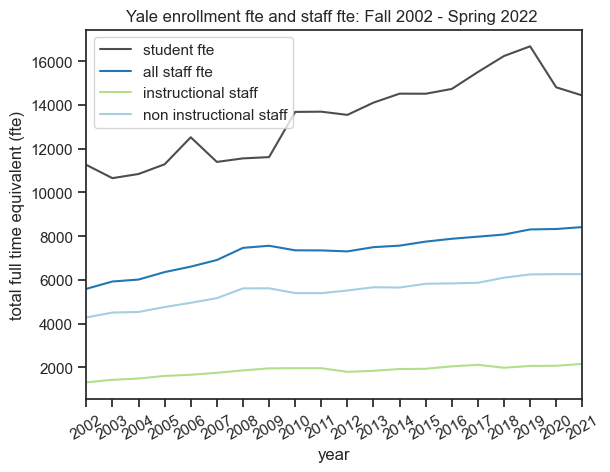

In [85]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
fte_all = sns.lineplot(x='year',y='fte', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('total full time equivalent (fte)')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()

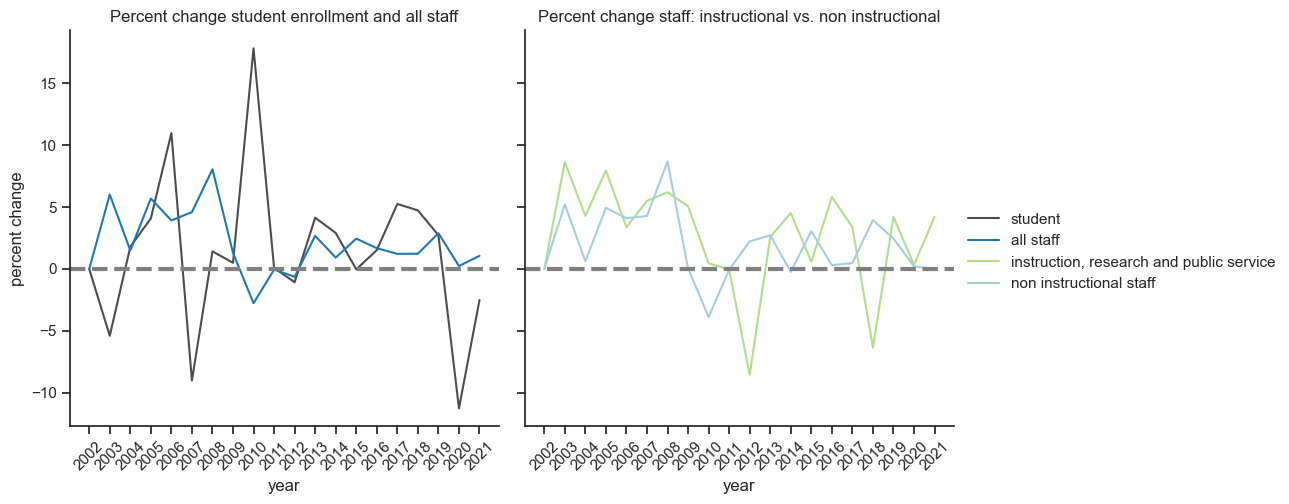

In [86]:
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']

yale_percent_change = sns.relplot(
    data=yale_all, x='year', y='percent change',
    col='detail', hue='type', legend='brief',
    kind="line",palette=custom_palette,
)

axes = yale_percent_change.axes.flatten()
axes[0].set_title("Percent change student enrollment and all staff")
axes[1].set_title("Percent change staff: instructional vs. non instructional")


yale_percent_change.set_xticklabels(rotation=45)

yale_percent_change._legend.set_title("")


for ax in axes:
    ax.axhline(0, ls='--', linewidth=3, color='grey')

plt.show()

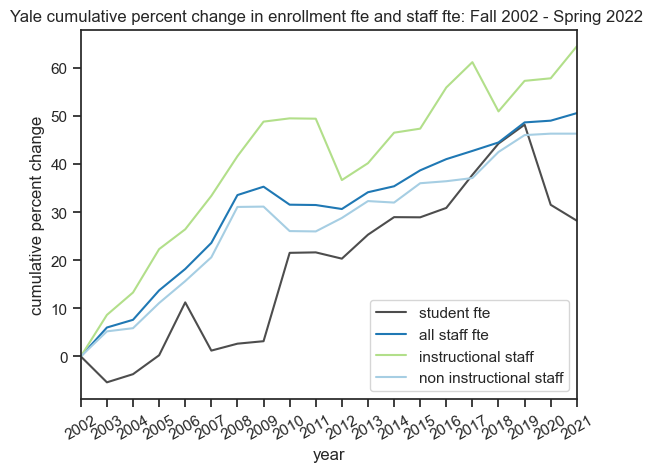

In [87]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
yale_percent_change_cumul = sns.lineplot(x='year',y='percent change cumulative', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('cumulative percent change')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale cumulative percent change in enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()

In [88]:
ivy = df[df['ivy league']=='ivy']
ivy = ivy.reset_index(drop=True)
ivy.head(2)


,unitid,instnm,addr,city,stabbr,zip,obereg,sector,iclevel,control,...,total instruction pt,total instruction staff fte,total non instruction,total non instruction ft,total non instruction pt,total non instruction staff fte,student fte per staff fte,student fte per instruction staff fte,student fte per non instruction staff fte,ivy league
0,130794,Yale University,NaN,NEW HAVEN,CT,6520,New England,"4-year private, not-for-profit",Four or more years,Private not-for-profit,...,238.0,1309.0,4560.0,4139.0,421.0,4279.0,2.02,8.60,2.63,ivy
1,166027,Harvard University,MASSACHUSETTS HALL,CAMBRIDGE,MA,2138,New England,"4-year private, not-for-profit",Four or more years,Private not-for-profit,...,368.0,1639.0,10262.0,8457.0,1805.0,9058.0,1.99,12.98,2.35,ivy


In [89]:
ivy_pct_change = ivy.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum'})
ivy_pct_change.columns = ['student_fte','staff_fte','instruction_staff_fte','non_instruction_staff_fte']
ivy_pct_change = ivy_pct_change.reset_index()

ivy_pct_change['student_pct_change'] = ivy_pct_change['student_fte'].pct_change()
ivy_pct_change['student_pct_change'] = (ivy_pct_change['student_pct_change']*100).round(2)

ivy_pct_change['staff_pct_change'] = ivy_pct_change['staff_fte'].pct_change()
ivy_pct_change['staff_pct_change'] = (ivy_pct_change['staff_pct_change']*100).round(2)

ivy_pct_change['instruction_staff_pct_change'] = ivy_pct_change['instruction_staff_fte'].pct_change()
ivy_pct_change['instruction_staff_pct_change'] = (ivy_pct_change['instruction_staff_pct_change']*100).round(2)

ivy_pct_change['non_instruction_staff_pct_change'] = ivy_pct_change['non_instruction_staff_fte'].pct_change()
ivy_pct_change['non_instruction_staff_pct_change'] = (ivy_pct_change['non_instruction_staff_pct_change']*100).round(2)

ivy_pct_change = ivy_pct_change.fillna(0.00)

#print(ivy_pct_change)

In [90]:
ivy_base_student = 11261
base_date = '2002-01-01'

def ivy_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student_fte']-ivy_base_student)/ivy_base_student)*100)
    else:
        return 0.0
    
ivy_pct_change['student_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_student(row), axis=1)

#print(yale_pct_change)

In [64]:
ivy_base_staff = 49167.0
base_date = '2002-01-01'

def ivy_pct_change_period_staff(row):
    if row['year'] != '2002-01-01':
        return (((row['staff_fte']-ivy_base_staff)/ivy_base_staff)*100)
    else:
        return 0.0
    
ivy_pct_change['staff_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_staff(row), axis=1)
ivy_pct_change['staff_pct_change_cumulative'] = ivy_pct_change['staff_pct_change_cumulative'].round(2)

#print(yale_pct_change)

In [65]:
ivy_base_instruction = 11127.0
base_date = '2002-01-01'

def ivy_pct_change_period_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['instruction_staff_fte']-ivy_base_instruction)/ivy_base_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['instruction_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_instruction(row), axis=1)
ivy_pct_change['instruction_pct_change_cumulative'] = ivy_pct_change['instruction_pct_change_cumulative'].round(2)

In [66]:
ivy_base_non_instruction = 38040.0
base_date = '2002-01-01'

def ivy_pct_change_period_non_instruction(row):
    if row['year'] != '2002-01-01':
        return (((row['non_instruction_staff_fte']-ivy_base_non_instruction)/ivy_base_non_instruction)*100)
    else:
        return 0.0
    
ivy_pct_change['non_instruction_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_non_instruction(row), axis=1)
ivy_pct_change['non_instruction_pct_change_cumulative'] = ivy_pct_change['non_instruction_pct_change_cumulative'].round(2)

#print(ivy_pct_change)

In [ ]:
sector_list = ['4-year public','4-year private, not-for-profit','4-year private, for-profit']
carnegie_grouped_list = ['Doctoral or Research Universities']

research = df[(df['sector'].isin(sector_list)) & (df['carnegie_grouped'].isin(carnegie_grouped_list))]
research = research.reset_index(drop=True)
research.head(2)

In [ ]:
research_pct_change = research.groupby(['year']).agg({'student fte':'sum','total staff fte':'sum','total instruction staff fte':'sum','total non instruction staff fte':'sum'})
research_pct_change.columns = ['student_fte','staff_fte','instruction_staff_fte','non_instruction_staff_fte']
research_pct_change = research_pct_change.reset_index()

research_pct_change['student_pct_change'] = research_pct_change['student_fte'].pct_change()
research_pct_change['student_pct_change'] = (research_pct_change['student_pct_change']*100).round(2)

research_pct_change['staff_pct_change'] = research_pct_change['staff_fte'].pct_change()
research_pct_change['staff_pct_change'] = (research_pct_change['staff_pct_change']*100).round(2)

research_pct_change['instruction_staff_pct_change'] = research_pct_change['instruction_staff_fte'].pct_change()
research_pct_change['instruction_staff_pct_change'] = (research_pct_change['instruction_staff_pct_change']*100).round(2)

research_pct_change['non_instruction_staff_pct_change'] = research_pct_change['non_instruction_staff_fte'].pct_change()
research_pct_change['non_instruction_staff_pct_change'] = (research_pct_change['non_instruction_staff_pct_change']*100).round(2)

research_pct_change = research_pct_change.fillna(0.00)

In [ ]:
resarch_base_student = 11261
base_date = '2002-01-01'

def ivy_pct_change_period_student(row):
    if row['year'] != '2002-01-01':
        return (((row['student_fte']-resarch_base_student)/resarch_base_student)*100)
    else:
        return 0.0
    
ivy_pct_change['student_pct_change_cumulative'] = ivy_pct_change.apply(lambda row: ivy_pct_change_period_student(row), axis=1)

#print(yale_pct_change)

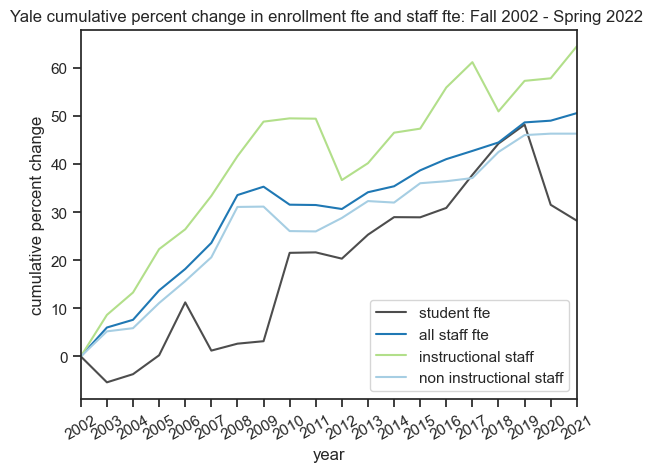

In [67]:
sns.set_theme(style="ticks")
custom_palette = ['#4d4d4d','#1f78b4','#b2df8a','#a6cee3']
              
ivy_percent_change_cumul = sns.lineplot(x='year',y='percent change cumulative', hue ='type', data=yale_all, legend='brief', palette=custom_palette)

plt.ylabel('cumulative percent change')
plt.xticks(rotation=30)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['student fte','all staff fte','instructional staff','non instructional staff'])
plt.title('Yale cumulative percent change in enrollment fte and staff fte: Fall 2002 - Spring 2022 ')
plt.show()